In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
#parent, child

DATA = {}

with open("./antfarm.dat",'r') as godotData:
    reader = csv.reader(godotData)
    for line in reader:
        if tuple(line) not in DATA.keys():
            DATA[tuple(line)] = 0
        DATA[tuple(line)]+=1
        
# print(DATA)

In [3]:
G = nx.DiGraph()

for edge, count in DATA.items():
    G.add_edge(edge[0],edge[1],weight=count)

In [4]:
# # nx.draw(G)
# # plt.show()

# nx.draw_kamada_kawai(G)
# plt.show()

# nx.draw_planar(G)
# plt.show()

# # nx.draw_random(G)
# # plt.show()

# nx.draw_spectral(G)
# plt.show()

# nx.draw_spring(G)
# plt.show()

# nx.draw_shell(G)
# plt.show()

In [5]:
#https://networkx.org/documentation/latest/auto_examples/drawing/plot_chess_masters.html#sphx-glr-auto-examples-drawing-plot-chess-masters-py
# nx.draw_networkx_edge_labels(G,nx.kamada_kawai_layout(G))

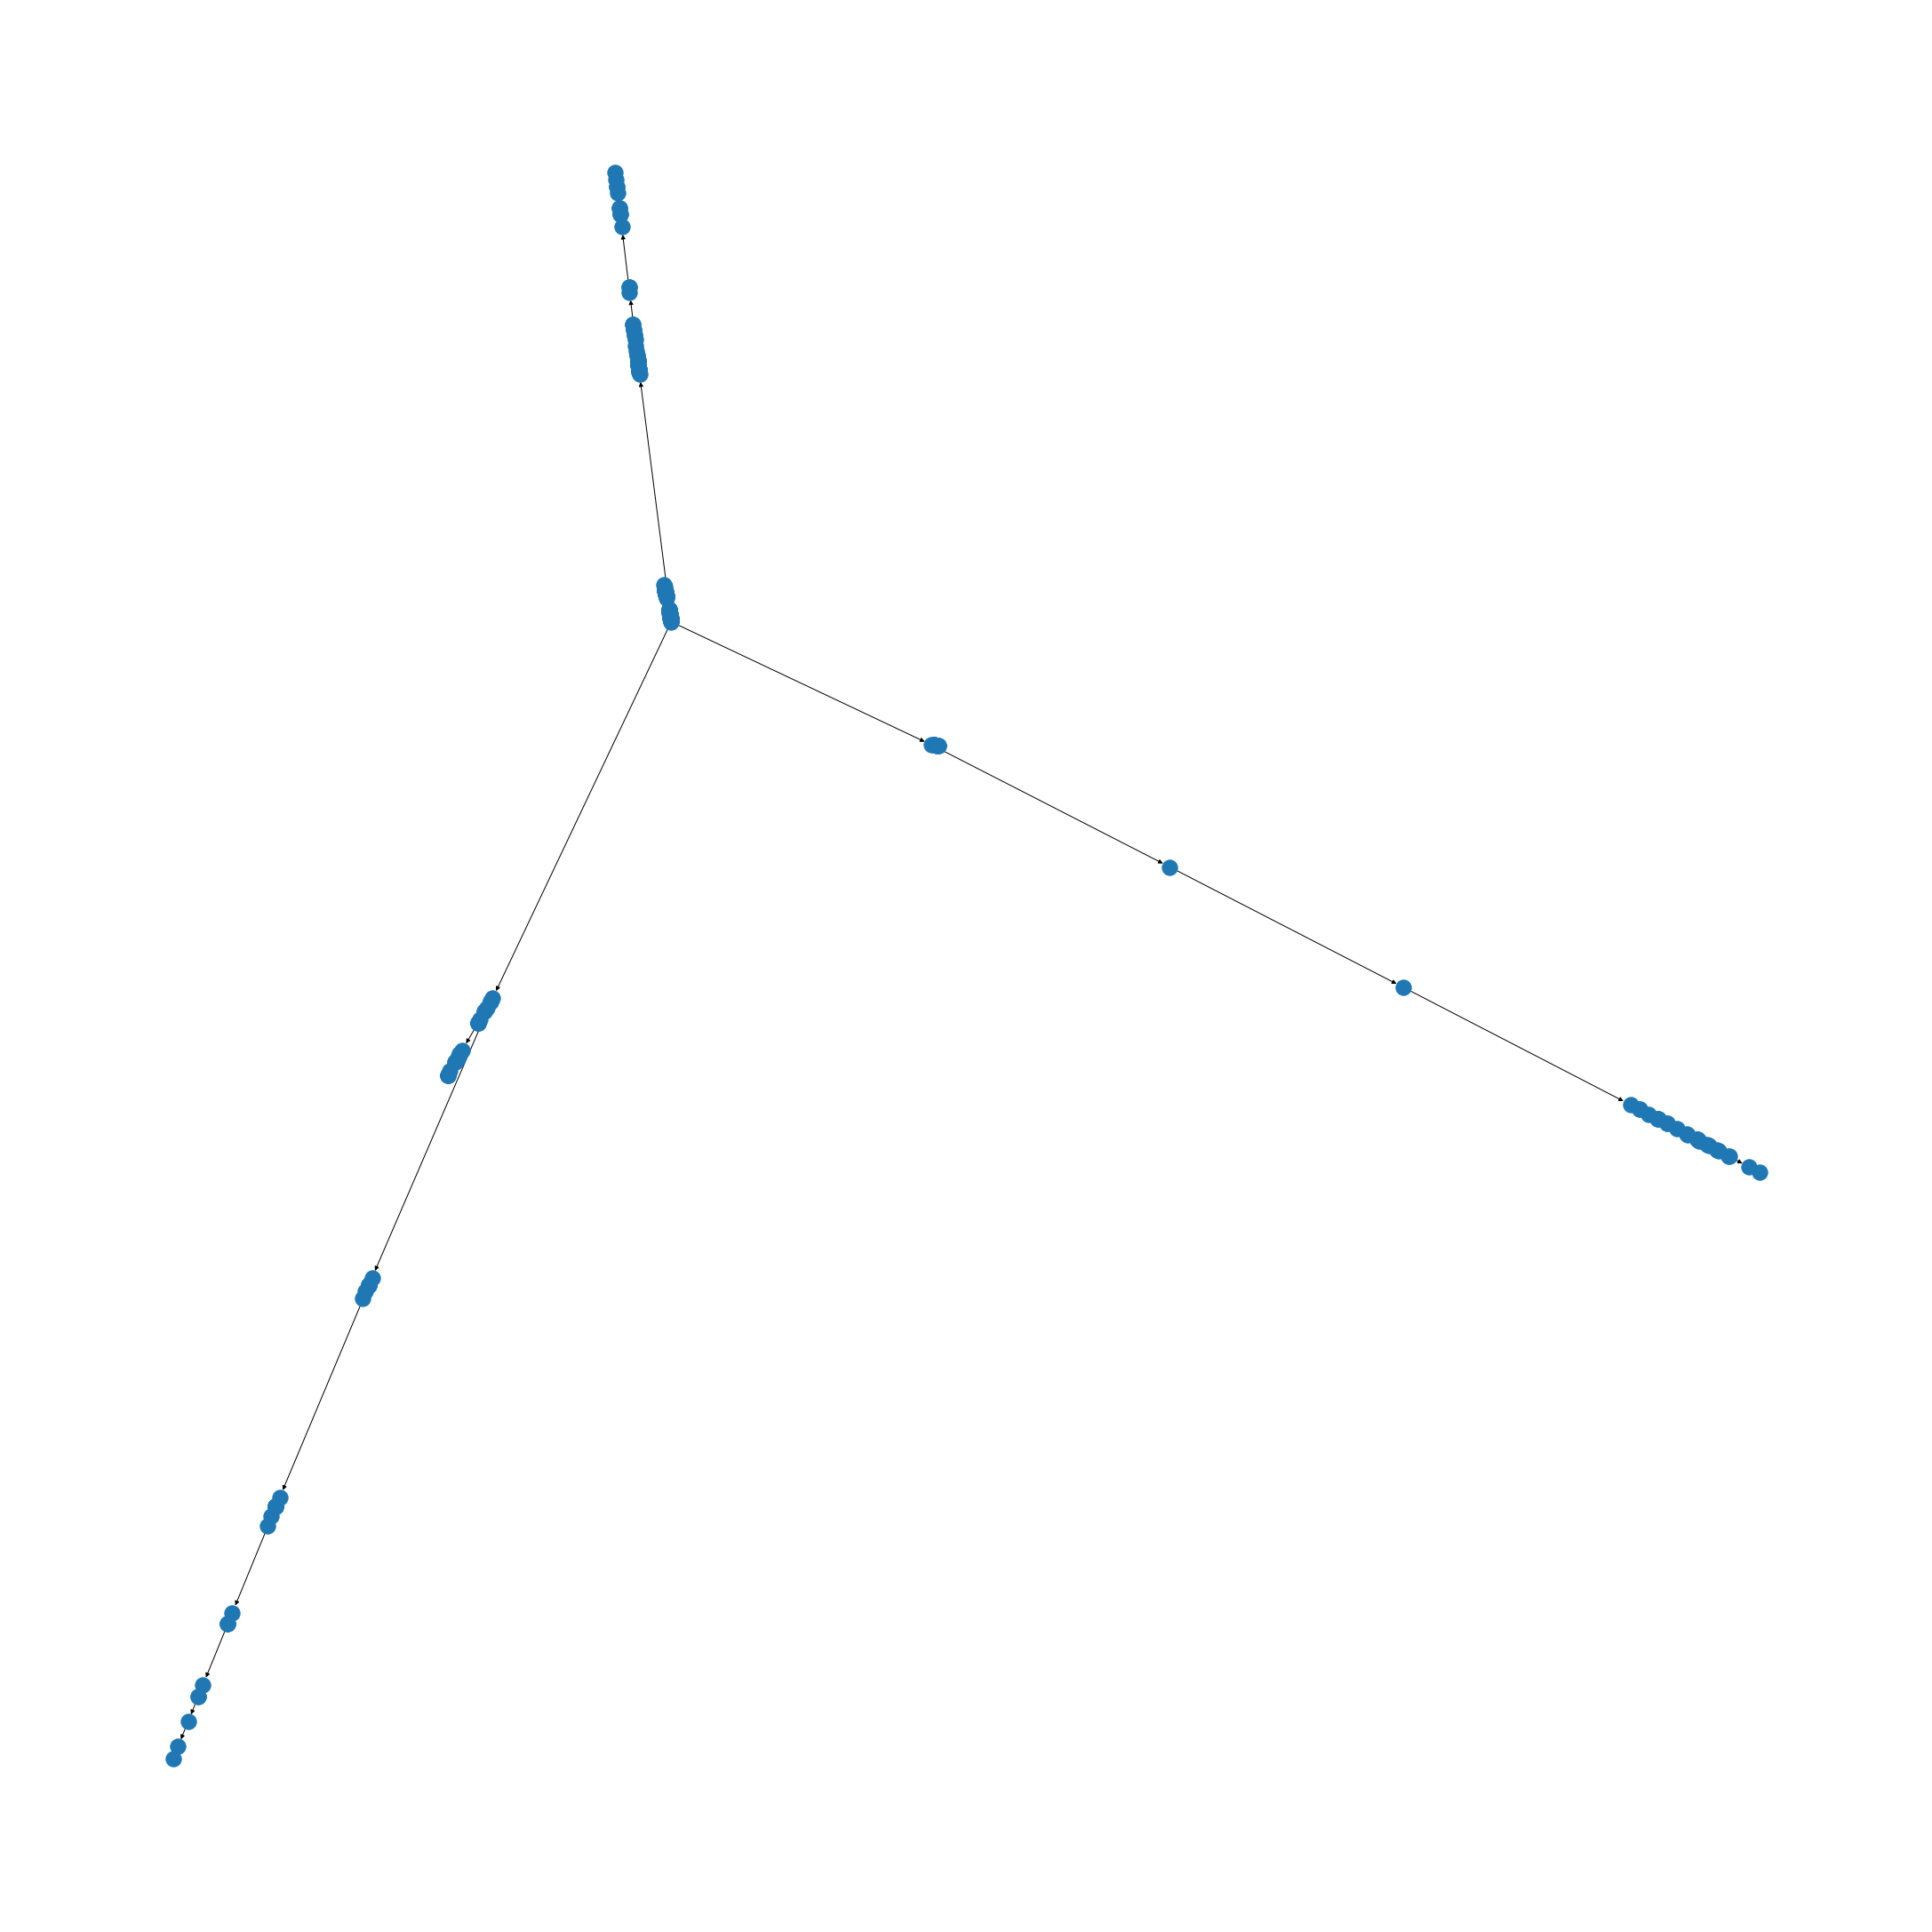

In [6]:
plt.figure(figsize=(30,30))
nx.draw_spectral(G)
plt.show()

In [7]:
myNodeWeights = {}
for key,value in DATA.items():
    parent, child = key
    if child not in myNodeWeights:
        myNodeWeights[child] = 0
    myNodeWeights[child] += value
    
for key,value in DATA.items():
    if key[0] not in myNodeWeights:
        myNodeWeights[key[0]] = 1
    
myNodeWeights["null"] = 0

print(myNodeWeights.values())

S = max(myNodeWeights.values())

for key in myNodeWeights:
    myNodeWeights[key] /= S

colorValues = [myNodeWeights[node] for node in G.nodes()]

dict_values([1, 1, 1, 1, 44, 1, 3, 3, 2, 1, 1, 1, 4, 1, 5, 1, 1, 1, 1, 4, 1, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 5, 3, 4, 6, 10, 3, 1, 1, 1, 1, 1, 1, 7, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 2, 6, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 16, 1, 1, 1, 5, 1, 1, 25, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 31, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 8, 9, 33, 2, 1, 11, 1, 1, 1, 9, 1, 1, 2, 1, 1, 27, 1, 1, 1, 2, 14, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1, 14, 1, 16, 2, 1, 1, 13, 16, 1, 1, 1, 1, 15, 2, 2, 1, 1, 2, 1, 2, 1, 3, 1, 1, 10, 20, 1, 5, 4, 1, 1, 1, 1, 1, 6, 2, 1, 2, 1, 1, 1, 2, 5, 1, 5, 1, 2, 1, 3, 8, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])


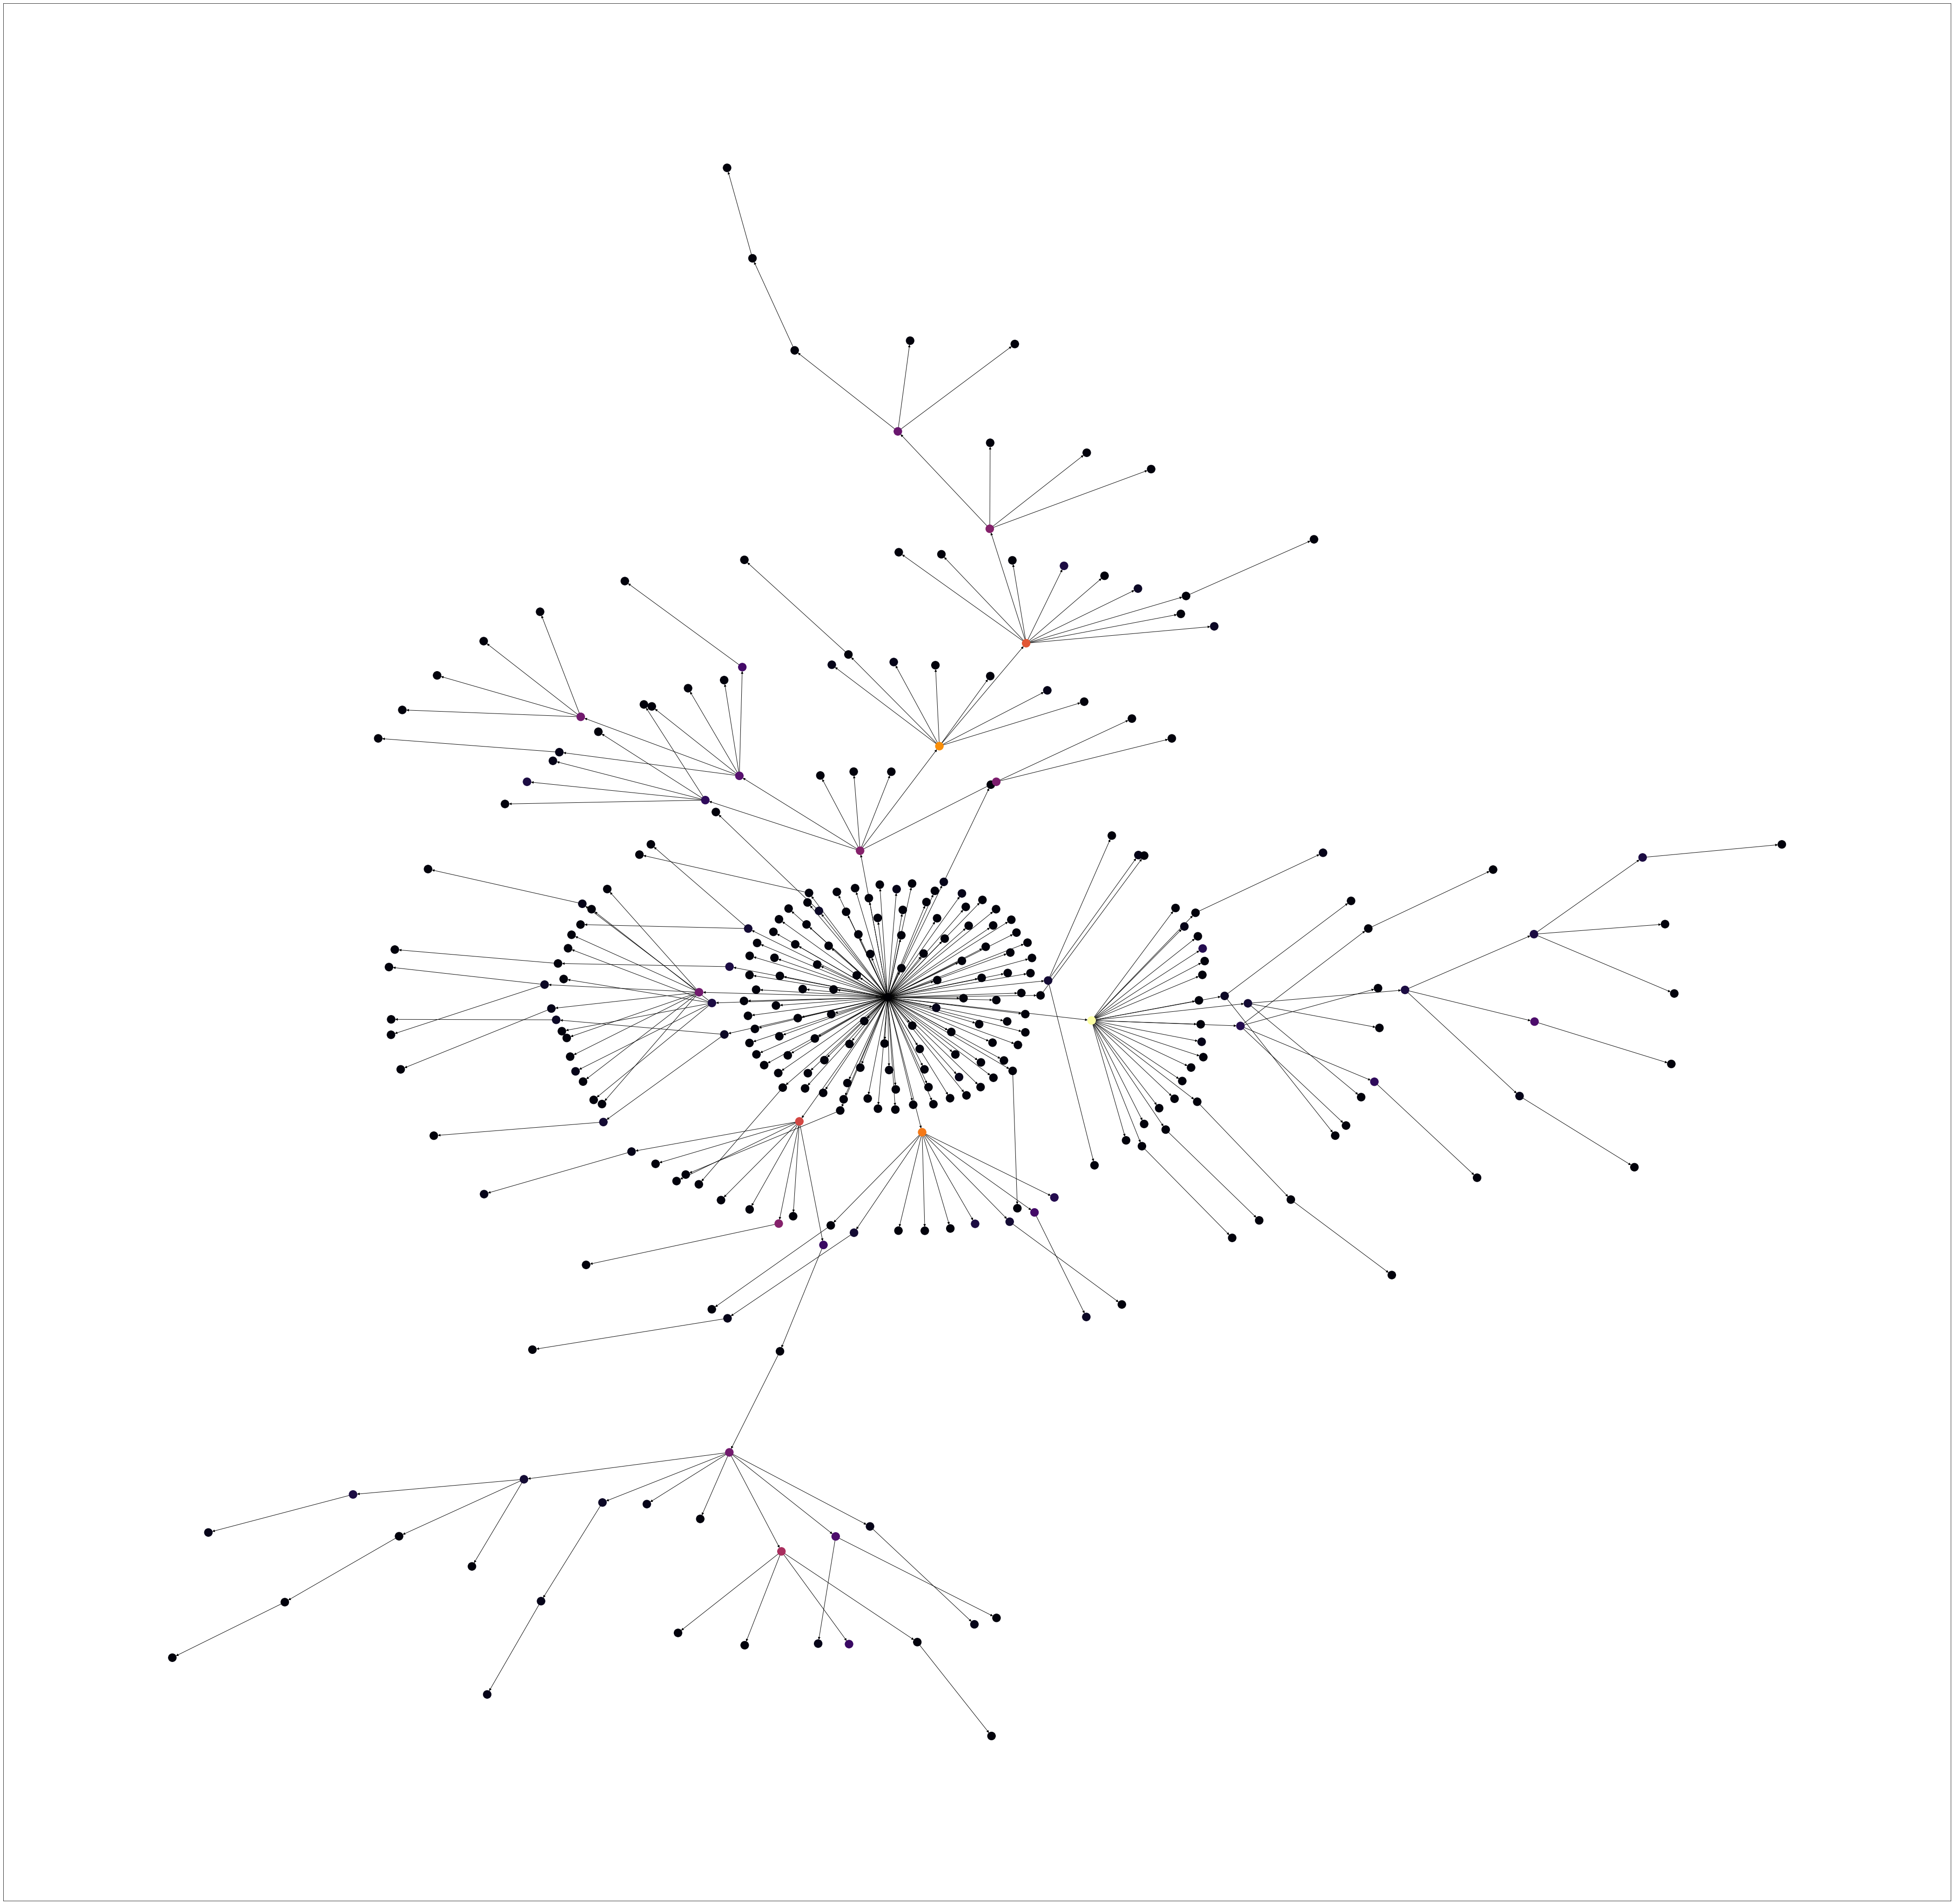

In [8]:
plt.figure(figsize=(75,75))
pos = nx.kamada_kawai_layout(G)
# pos = nx.spectral_layout(G)
# pos = nx.planar_layout(G)
pos = nx.nx_agraph.graphviz_layout(G)

nx.draw_networkx_nodes(G, pos=pos, cmap = plt.get_cmap('inferno'), node_color=colorValues)
nx.draw_networkx_edges(G, pos=pos)
# nx.draw_networkx_edge_labels(G, pos=pos)
plt.savefig('history.pdf') 
plt.show()